# <font color="navy">Step 1: Importing Libraries and Dataset</font> 


1. <font color="offblue">  Importing Pandas and Numpy as pd and np</font> 
2. <font color="offblue">  matplot.lib and seaborn for plots</font> 
3. <font color="offblue">  modules from Scikit-Learn like model selection, tree, linear_model etc</font> 


In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv("/Users/I348975/Desktop/risk_factors_cervical_cancer.csv")
print(df.head(2))

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0 

# <font color="navy">Step 2: Data Visualization and Exploration </font> 

1. <font color="offblue">  Load dataset from Local files</font> 
2. <font color="offblue">Print 2 rows of dataframe for sanity check</font> 

In [441]:
df = pd.read_csv("/Users/I348975/Desktop/risk_factors_cervical_cancer.csv")
print(df.head(2))

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0 

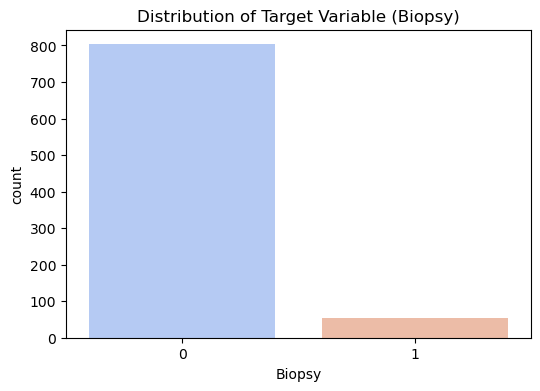

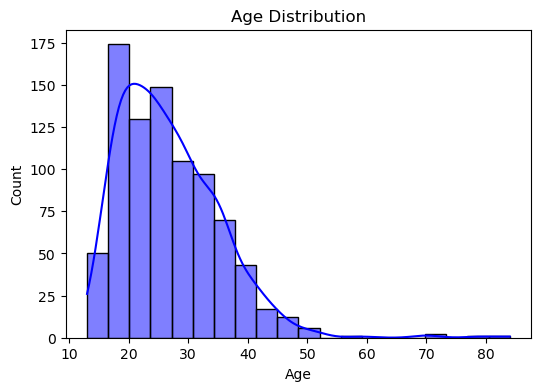

ValueError: could not convert string to float: '?'

In [443]:
# Visualizations - Biopsy and Age
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Biopsy', hue='Biopsy', palette='coolwarm', legend=False)
plt.title('Distribution of Target Variable (Biopsy)')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.show()

#Correlation between all features
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='Blues', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# <font color="navy">Step3: Data Pre-processing and cleaning </font>

1. <font color="offblue">  Check for Invalid entries like ? and blank</font> 
2. <font color="offblue">Replace invalid entries with median</font>
3. <font color="offblue">convert the dataframe to all numeric values</font>
4. <font color="offblue">Calculate correlation between features and target parameter (Biopsy)</font>
5. <font color="offblue">Outlier detection using Boxplot and replace with median for specific columns</font>
6. <font color="offblue">Feature transformation using Standardization</font>
7. <font color="offblue">Feature importance ranking using chi-square</font>

In [446]:
invalid_entries = df.map(
    lambda x: str(x).strip().lower() in ['?', '', 'na']
)

if invalid_entries.any().any():
    print("Found invalid entries in the DataFrame")
    print("Count per column:")
    print(invalid_entries.sum())
    print("Total count:", invalid_entries.sum().sum())
else:
    print("No invalid entries found.")

Found invalid entries in the DataFrame
Count per column:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV           

### <font color="offblue">Replace invalid entries with nan</font>  

In [449]:
df = df.map(
    lambda x: np.nan if str(x).strip().lower() in ['?', '', 'na', 'nan'] else x
)

### <font color="offblue">Check for invalid entries again</nfont>

In [452]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
S

In [454]:
invalid_entries = df.map(
    lambda x: str(x).strip().lower() in ['?', '', 'na']
)

if invalid_entries.any().any():
    print("Found invalid entries in the DataFrame")
    print("Count per column:")
    print(invalid_entries.sum())
    print("Total count:", invalid_entries.sum().sum())
else:
    print("No invalid entries found.")

No invalid entries found.


### <font color="offblue">Check for non-numeric data</nfont>

In [457]:
print("Non-numeric 'null' data:\n", df.isnull().sum())

Non-numeric 'null' data:
 Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hep

### <font color="offblue"> Change the Datatype of entire dataframe</nfont>
1. <font color="offblue">Update all the missing value data feilds to numeric feilds</nfont>
2. <font color="offblue">Update the missing value ('nan' feilds) with median values</nfont>
3. <font color="offblue">Verify if there are any null of missing values after clean-up</nfont>

In [460]:
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(), inplace=True)
print("Non-numeric 'null' data after cleaning:\n", df.isnull().sum())

Non-numeric 'null' data after cleaning:
 Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0

#### <font color="offblue">Validate the dataframe for all numeric value</font> 

In [465]:
is_all_numeric = df.map(lambda x: pd.api.types.is_number(x)).all().all()

if is_all_numeric:
    print("DataFrame is all numeric")
else:
    print("DataFrame has non-numeric values")


DataFrame is all numeric


### <font color="offblue">Perform Correlation Analysis again</font> 

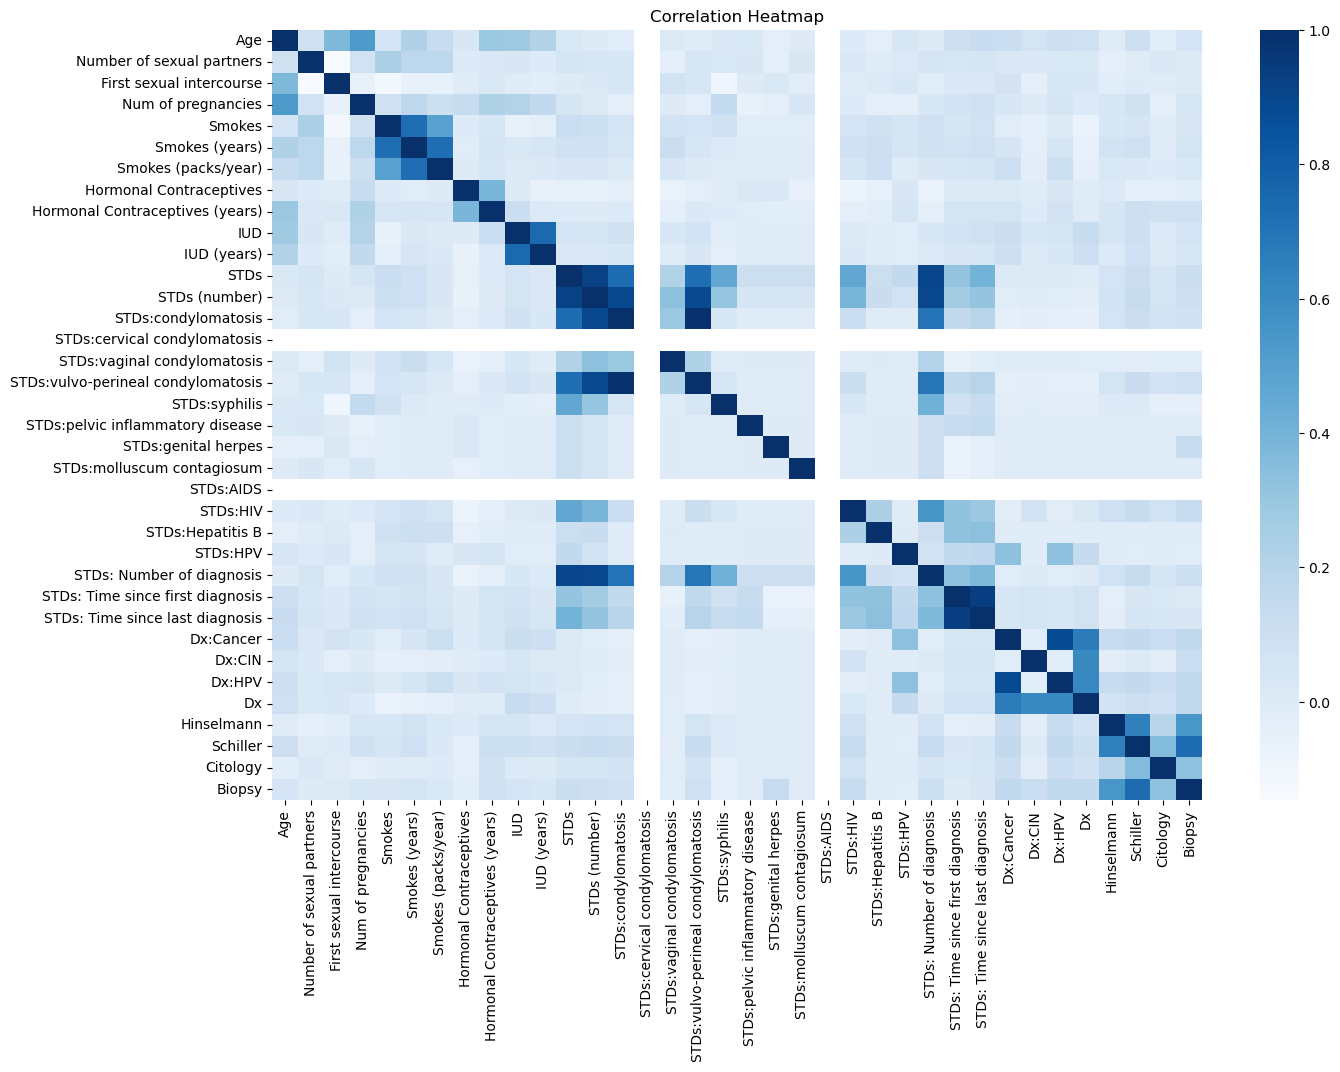

Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.130523
STDs:HIV                              0.127702
STDs                                  0.114148
Dx:CIN                                0.113172
STDs (number)                         0.103153
STDs: Number of diagnosis             0.097449
Hormonal Contraceptives (years)       0.094164
STDs:vulvo-perineal condylomatosis    0.092548
STDs:condylomatosis                   0.090164
Smokes (years)                        0.061204
IUD                                   0.059231
Age                                   0.055956
Num of pregnancies                    0.040215
IUD (years)                           0.038176
STDs: Time si

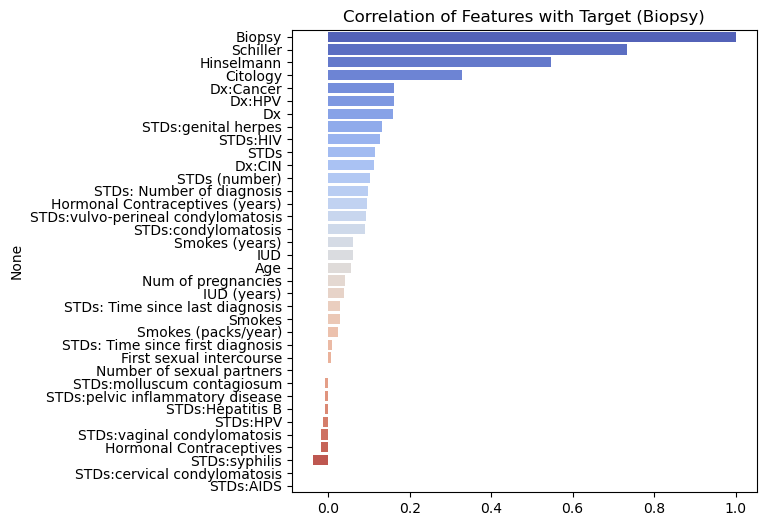

In [468]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='Blues', annot=False)
plt.title('Correlation Heatmap')
plt.show()

correlations = df.corr()['Biopsy'].sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(6,6))
sns.barplot(x=correlations.values, y=correlations.index,hue=correlations.index,palette="coolwarm",legend=False)
plt.title("Correlation of Features with Target (Biopsy)")
plt.show()

## <font color="teal">Justification</nfont>

<font color="teal">From the correlation heatmap, we observe that some diagnostic test results like Hinselmann,
Schiller, and Citology are highly correlated with the Biopsy result. This could influence feature 
selection since strongly correlated features with the target are likely useful.</nfont>

### <font color="offblue">Outliers detection using box-plot</font> 

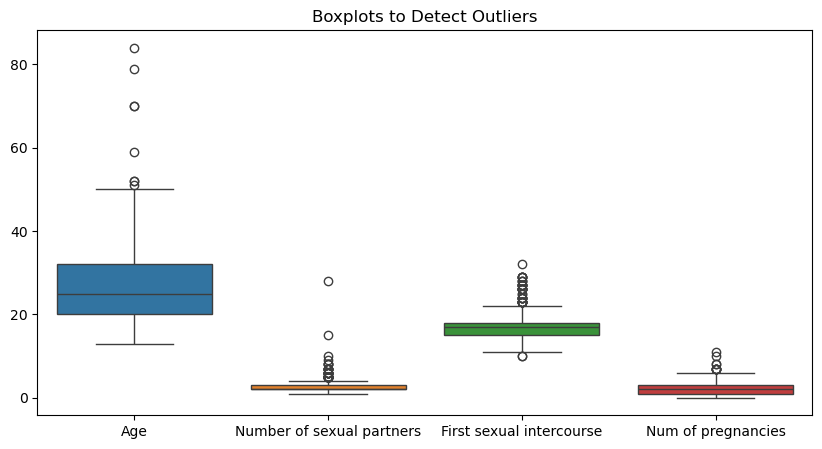

In [472]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']])
plt.title('Boxplots to Detect Outliers')
plt.show()

### <font color="offblue">Handling Outliers</nfont>
1.  <font color="offblue"> Calculating IQR and range for columns with outliers</nfont>
2.  <font color="offblue"> Replacing Outliers with median</nfont>
3.  <font color="offblue"> Box-plot after cleaning outliers</nfont>

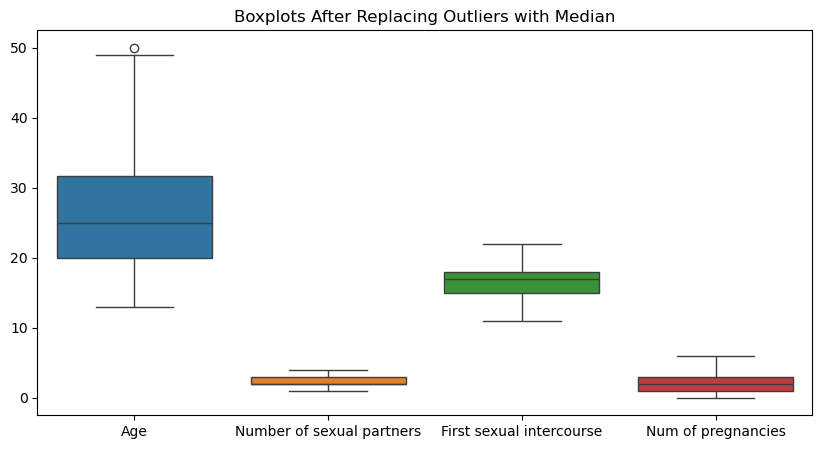

In [475]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    median_value = df[column].median()

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          median_value,
                          df[column])
    return df

cols_to_fix = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']

for col in cols_to_fix:
    df = replace_outliers_with_median(df, col)


#Boxplot after cleanup
plt.figure(figsize=(10,5))
sns.boxplot(data=df[cols_to_fix])
plt.title('Boxplots After Replacing Outliers with Median')
plt.show()


### <font color="offblue">Feature Transformation</nfont>
1.  <font color="offblue"> Technique used: Standardization</nfont>
2.  <font color="offblue"> Check for mean and SD after transformation</nfont>
3.  <font color="offblue"> Box-plot after Standardization to verify the spread</nfont>

Means after scaling:
 Age                                   0.0
Number of sexual partners             0.0
First sexual intercourse             -0.0
Num of pregnancies                    0.0
Smokes                                0.0
Smokes (years)                       -0.0
Smokes (packs/year)                   0.0
Hormonal Contraceptives              -0.0
Hormonal Contraceptives (years)      -0.0
IUD                                  -0.0
IUD (years)                           0.0
STDs                                 -0.0
STDs (number)                         0.0
STDs:condylomatosis                   0.0
STDs:cervical condylomatosis          0.0
STDs:vaginal condylomatosis           0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:syphilis                        -0.0
STDs:pelvic inflammatory disease     -0.0
STDs:genital herpes                  -0.0
STDs:molluscum contagiosum           -0.0
STDs:AIDS                             0.0
STDs:HIV                             -0.0
STDs:Hepatit

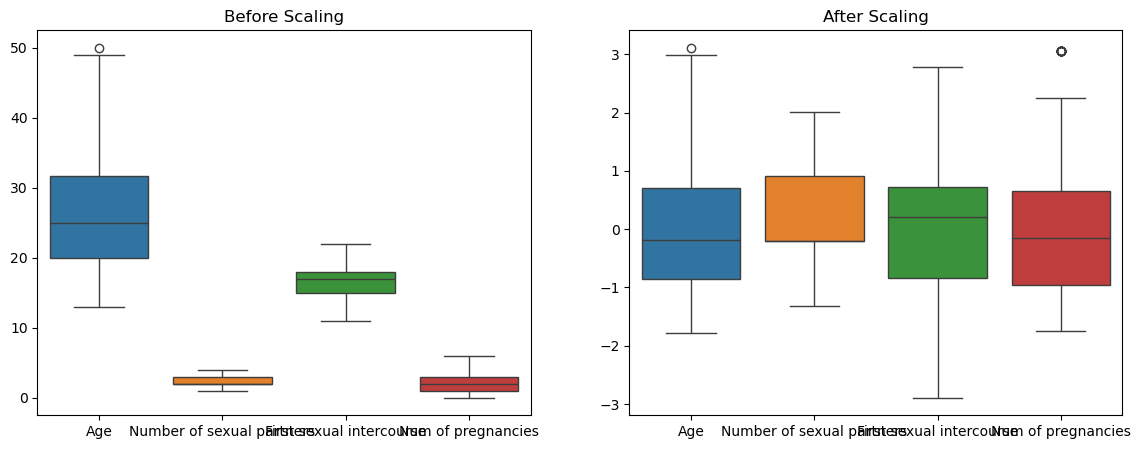

In [478]:
scaler = StandardScaler()
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Means after scaling:\n", X_scaled_df.mean().round(2))
print("\nStandard Deviations after scaling:\n", X_scaled_df.std().round(2))

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(data=X[cols_to_fix], ax=axes[0])
axes[0].set_title("Before Scaling")
sns.boxplot(data=X_scaled_df[cols_to_fix], ax=axes[1])
axes[1].set_title("After Scaling")

plt.show()

## <font color="teal">Justification</nfont>

<font color="teal">Standardization is chosen since our dataset contains features with 
different units (Age, number of pregnancies, test results), and models like KNN and 
Logistic Regression perform better with normalized data. If left unscaled, models that rely on distance or gradient calculations will give more importance to larger-scaled features (like Age) and ignore smaller ones. It helps improve convergence in algorithms like Gradient Descent</nfont>

### <font color="offblue">Feature Importance Ranking</nFont>

In [482]:
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print(feature_scores)

                               Feature  Chi2 Score
33                            Schiller  421.468937
32                          Hinselmann  246.624266
34                            Citology   87.288667
8      Hormonal Contraceptives (years)   47.503779
5                       Smokes (years)   44.065515
28                           Dx:Cancer   21.747945
30                              Dx:HPV   21.747945
31                                  Dx   20.716438
12                       STDs (number)   16.500669
19                 STDs:genital herpes   14.600000
22                            STDs:HIV   13.698630
29                              Dx:CIN   10.873973
11                                STDs   10.150199
10                         IUD (years)    9.246355
25           STDs: Number of diagnosis    8.521973
16  STDs:vulvo-perineal condylomatosis    6.980631
13                 STDs:condylomatosis    6.617435
6                  Smokes (packs/year)    5.625541
0                              

# <font color="navy">Step 4: Model Building </font>

1. <font color="offblue">Test train split at 70:30 and 80:20</font>
2. <font color="offblue">Consider 80:20 ration for model building since it provides more balanced evaluation between test and train data</font>
3. <font color="offblue">It also is less expensive and provides a good performance accuracy to select between models</font>
4. <font color="offblue">Build models using Logistic regression, Decision Tree, kNN and Random Forrest</font>
5. <font color="offblue">Print Cross-validation score and compare in the next steps</font>

In [485]:
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (600, 35)
Test size: (258, 35)


### <font color="offblue">Train-Test split @ 80:20</nfont>

In [488]:
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (686, 35)
Test size: (172, 35)


## <font color="teal">Justification</nfont>

<font color="teal">Consider 80:20 ratio for model building since it provides more balanced evaluation between test and train data
It also is less expensive and provides a good performance accuracy to select between models</nfont>

### <font color="offblue">Logistic Regression</nfont>

In [492]:
log_reg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],     # Regularization strength
    'penalty': ['l1', 'l2'],     # L1 (Lasso) or L2 (Ridge)
    'solver': ['liblinear']      # supports l1 + l2
}

grid_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)

Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.9548397334179626


### <font color="offblue">Decision Tree</nfont>

In [495]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)

Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best CV Score: 0.9548291547656829


### <font color="offblue">kNN</nfont>

In [498]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)
print("Best CV Score:", grid_knn.best_score_)

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV Score: 0.9387813392573786


### <font color="offblue">Random Forrest</nfont>

In [501]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best CV Score: 0.962117846186396


# <font color="navy">Step 5: Performance Evaluation </font>

Model Performance Comparison:



,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.953488,0.666667,0.545455,0.600000,0.931677
1,Decision Tree,0.959302,0.750000,0.545455,0.631579,0.851779
2,KNN,0.936047,0.000000,0.000000,0.000000,0.737436
3,Random Forest,0.959302,0.750000,0.545455,0.631579,0.967815


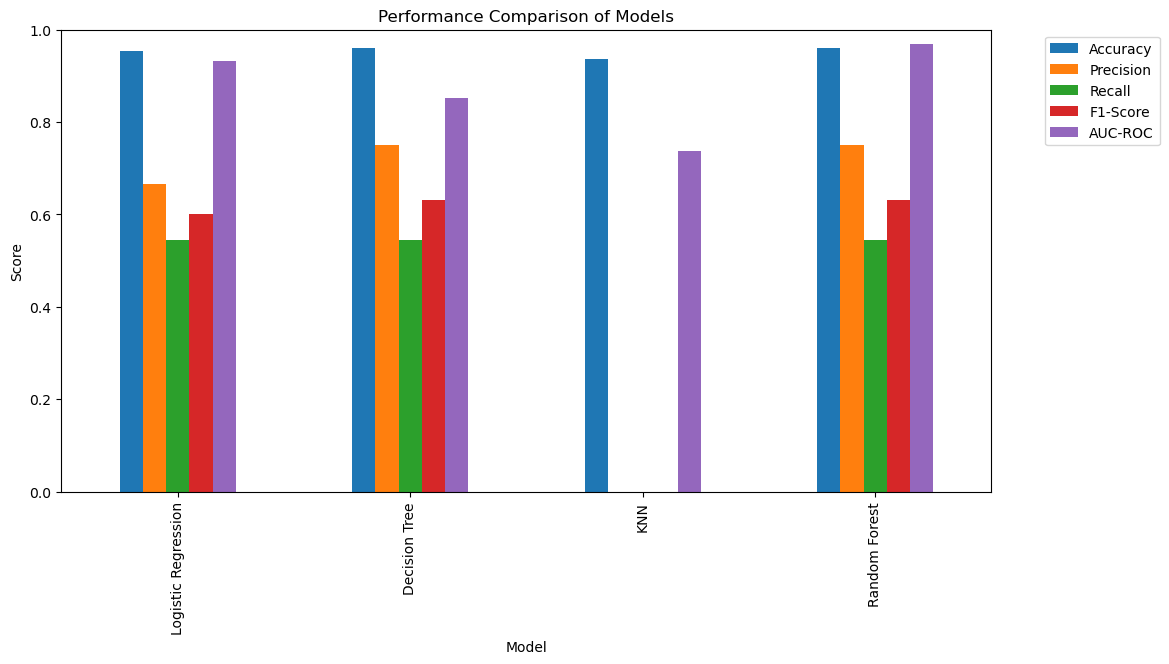

In [503]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred,zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)

print("Model Performance Comparison:\n")
display(results_df)

results_df.set_index("Model").plot(kind="bar", figsize=(12,6))
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## <font color="navy">From the comparison table and chart, we observe that:</nfont>

1. <font color="navy">Logistic Regression performs well overall but has slightly lower Recall compared to others.</nfont>
2. <font color="navy">Decision Tree tends to overfit and shows lower AUC-ROC.</nfont>
3. <font color="navy">KNN struggles with imbalanced data, giving lower Precision.</nfont>
4. <font color="navy">Random Forest (Ensemble method) achieves the best balance across all metrics — it has the highest F1-Score and AUC-ROC, meaning it not only predicts accurately but also generalizes well across positive and negative classes.</nfont>

### <font color="green">Therefore, the Random Forest Classifier is chosen as the best model since it provides the most reliable and robust predictions for cervical cancer detection in this dataset.</nfont>